In [63]:
library(repr)
library(tidyverse)

In [64]:
data <- read_csv("data/OnlineNewsPopularity.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



In [65]:
named_data <- data %>%
    rename(
        monday = weekday_is_monday,
        tuesday = weekday_is_tuesday,
        wednesday = weekday_is_wednesday,
        thursday = weekday_is_thursday,
        friday = weekday_is_friday,
        saturday = weekday_is_saturday,
        sunday = weekday_is_sunday,
        lifestyle = data_channel_is_lifestyle,
        entertainment =  data_channel_is_entertainment,
        business = data_channel_is_bus,
        society_and_medicine =  data_channel_is_socmed,
        technology =  data_channel_is_tech,
        world =  data_channel_is_world
    )
#It didn't work when all in one pipe, I have no idea why. This seems to work though
tidy_data <- named_data %>%
    pivot_longer(cols =  lifestyle : world, 
                 names_to = 'Genre', 
                 values_to = 'Genre_Present') %>%
    pivot_longer(cols =   monday:sunday, 
                 names_to = 'Day_Of_Week', 
                 values_to = 'Day_Present') %>%
    filter(Genre_Present == 1) %>%
    filter(Day_Present == 1) %>%
    mutate(abs_pos_neg_ratio = (global_rate_positive_words*avg_positive_polarity)/abs(global_rate_negative_words*avg_negative_polarity)) %>%
    filter(global_rate_positive_words != 0 & global_rate_negative_words != 0) %>%
    select(Genre, Day_Of_Week, shares,  abs_pos_neg_ratio)

tidy_data

Genre,Day_Of_Week,shares,abs_pos_neg_ratio
<chr>,<chr>,<dbl>,<dbl>
entertainment,monday,593,3.6060606
business,monday,711,6.6443381
business,monday,1500,6.3750000
entertainment,monday,1200,2.0880083
technology,monday,505,11.4900244
technology,monday,855,1.9778000
lifestyle,monday,556,8.6191099
technology,monday,891,9.7485037
technology,monday,3600,6.8000000


`summarise()` regrouping output by 'Genre' (override with `.groups` argument)



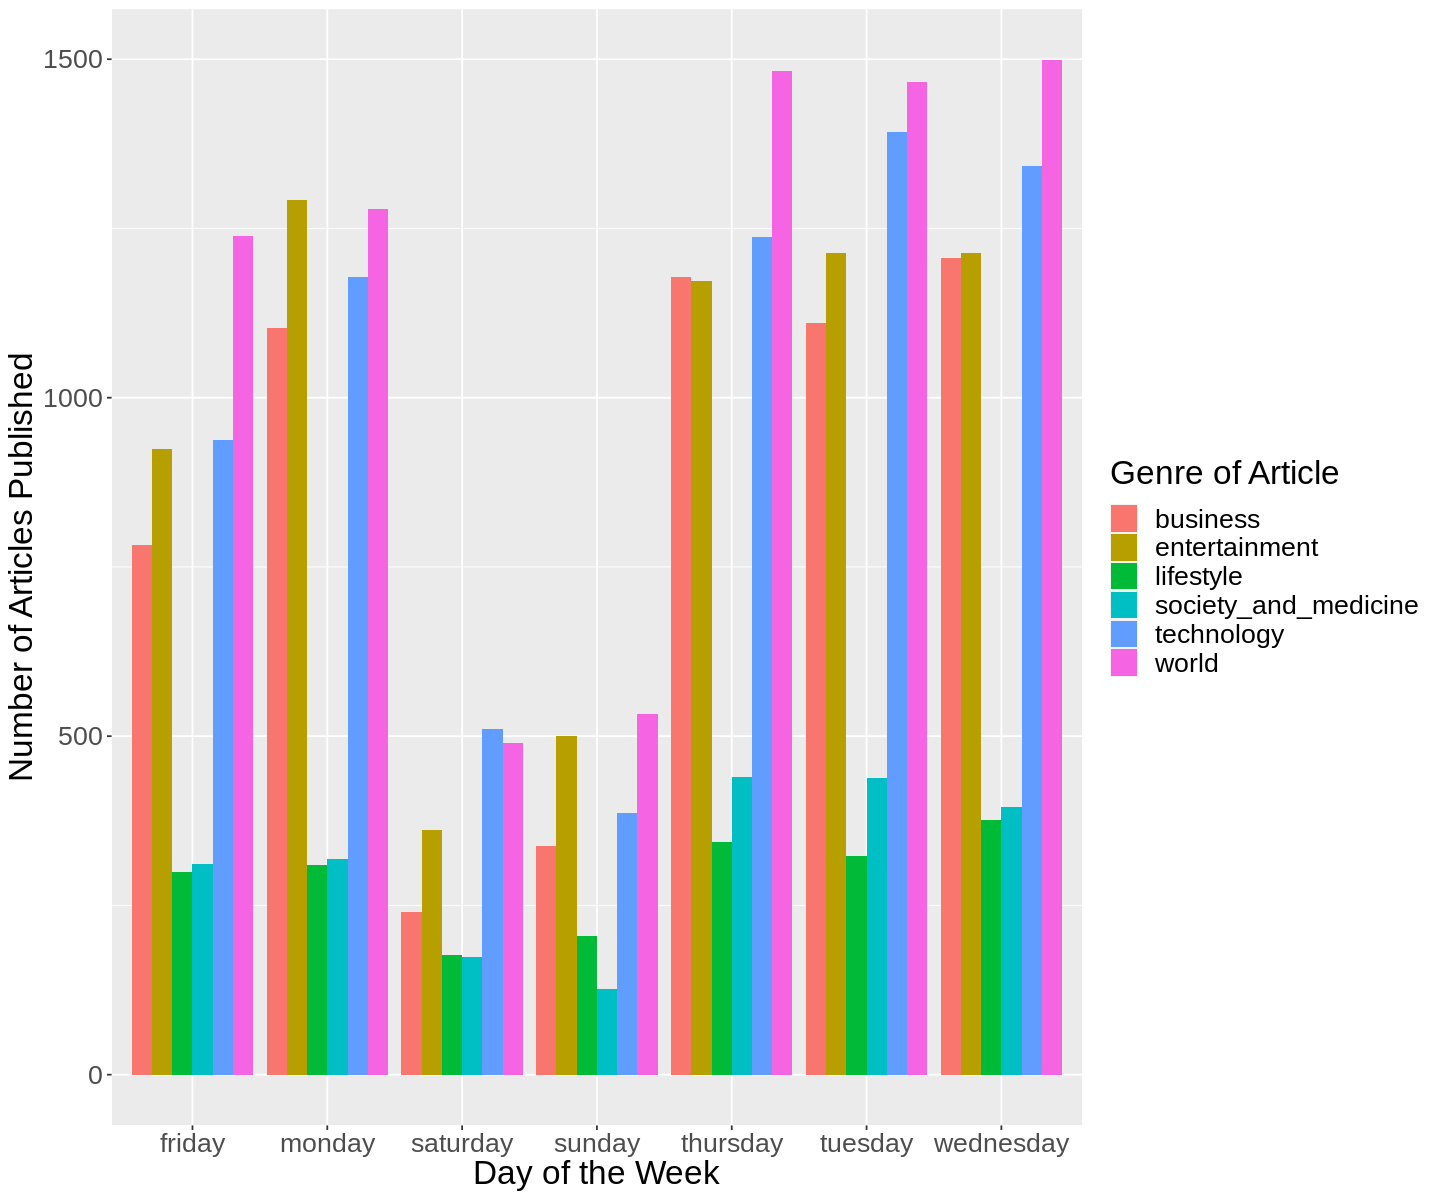

In [66]:
publish_data <- tidy_data %>%
    group_by(Genre, Day_Of_Week) %>%
    summarize(n = n())


options(repr.plot.width = 12, repr.plot.height = 10)
publish_plot <- publish_data %>%
    ggplot(aes(x = Day_Of_Week, y = n, fill = Genre)) + 
    geom_bar(stat = 'identity', position = "dodge") +
    xlab("Day of the Week") +
    ylab("Number of Articles Published") +
    labs(fill = "Genre of Article") +
    theme(text = element_text(size = 20))

publish_plot

In [67]:
share_data_avg <- tidy_data %>%
    group_by(Day_Of_Week, Genre) %>%
    summarize(n = n(), Average_Shares_Per_Article = mean(shares)/n)

head(share_data_avg)

`summarise()` regrouping output by 'Day_Of_Week' (override with `.groups` argument)



Day_Of_Week,Genre,n,Average_Shares_Per_Article
<chr>,<chr>,<int>,<dbl>
friday,business,782,3.088500
friday,entertainment,924,3.261690
friday,lifestyle,299,10.217895
friday,society_and_medicine,311,12.906918
friday,technology,937,3.269728
friday,world,1239,1.812434


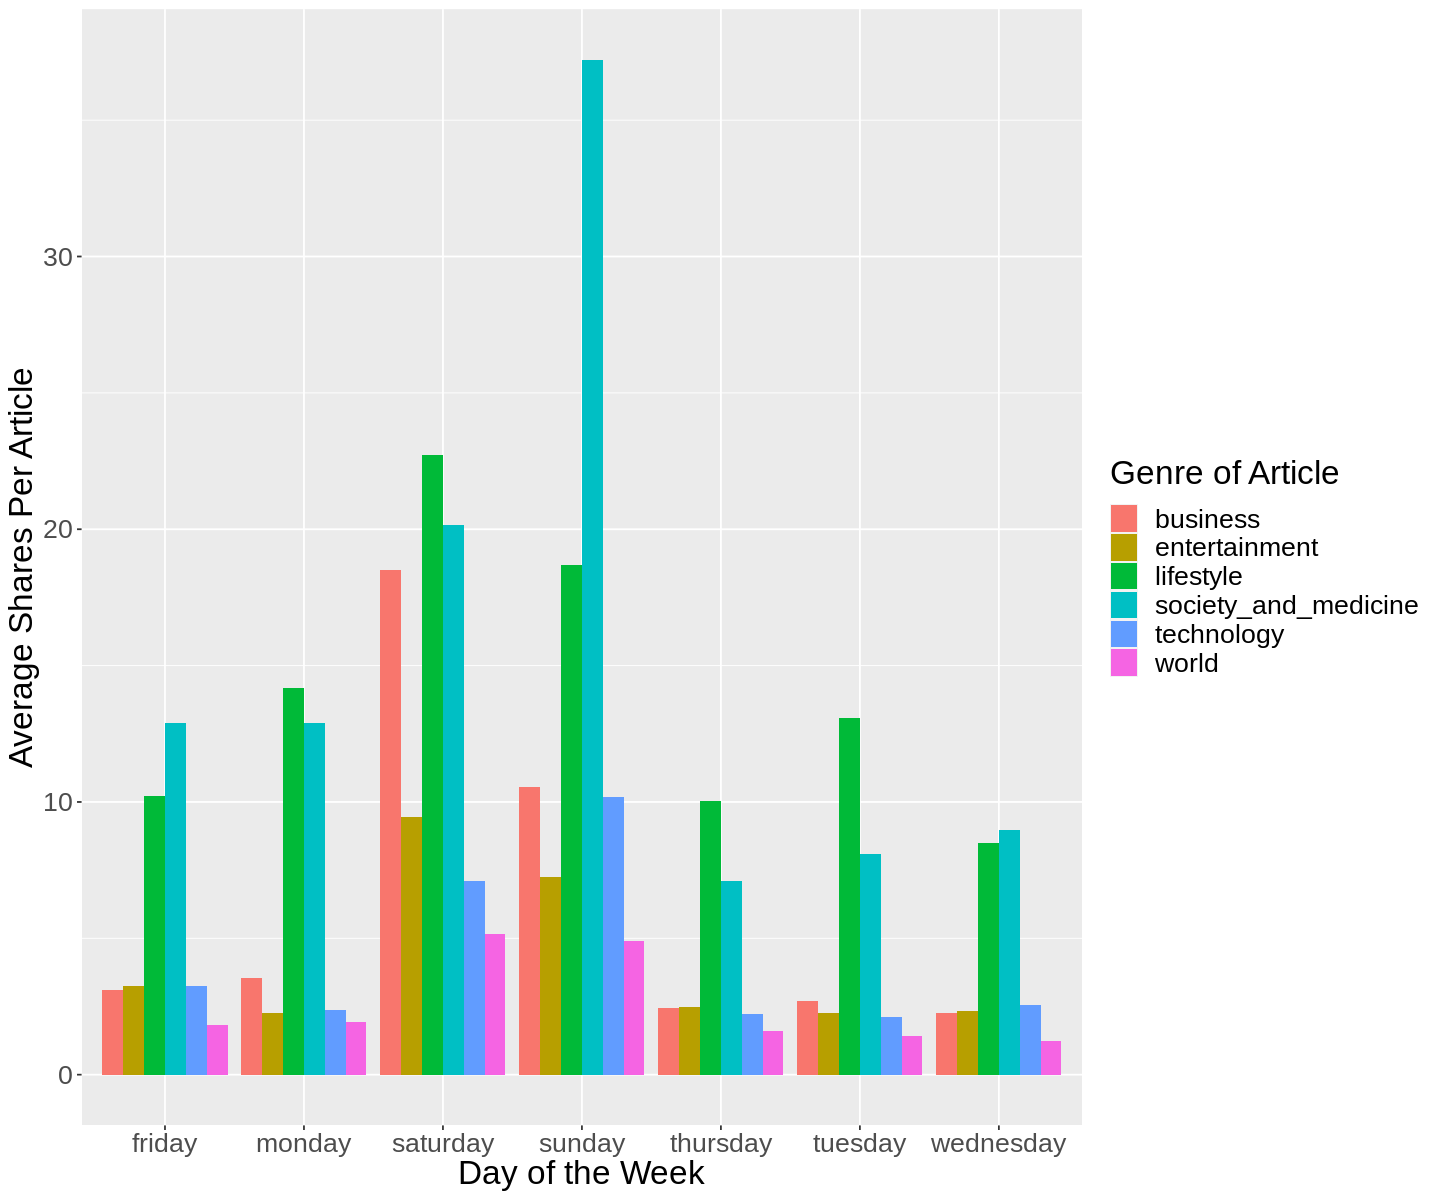

In [69]:



options(repr.plot.width = 12, repr.plot.height = 10)
share_plot <- share_data_avg %>%
    ggplot(aes(x = Day_Of_Week, y = Average_Shares_Per_Article, fill = Genre)) + 
    geom_bar(stat = 'identity', position = "dodge") +
    xlab("Day of the Week") +
    ylab("Average Shares Per Article") +
    labs(fill = "Genre of Article") +
    theme(text = element_text(size = 20))

share_plot

In [70]:
share_data_totals <- tidy_data %>%
    group_by(Day_Of_Week, Genre) %>%
    summarize(n = n(), shares = sum(shares))

head(share_data_totals)

`summarise()` regrouping output by 'Day_Of_Week' (override with `.groups` argument)



Day_Of_Week,Genre,n,shares
<chr>,<chr>,<int>,<dbl>
friday,business,782,1888692
friday,entertainment,924,2784753
friday,lifestyle,299,913490
friday,society_and_medicine,311,1248370
friday,technology,937,2870720
friday,world,1239,2782305


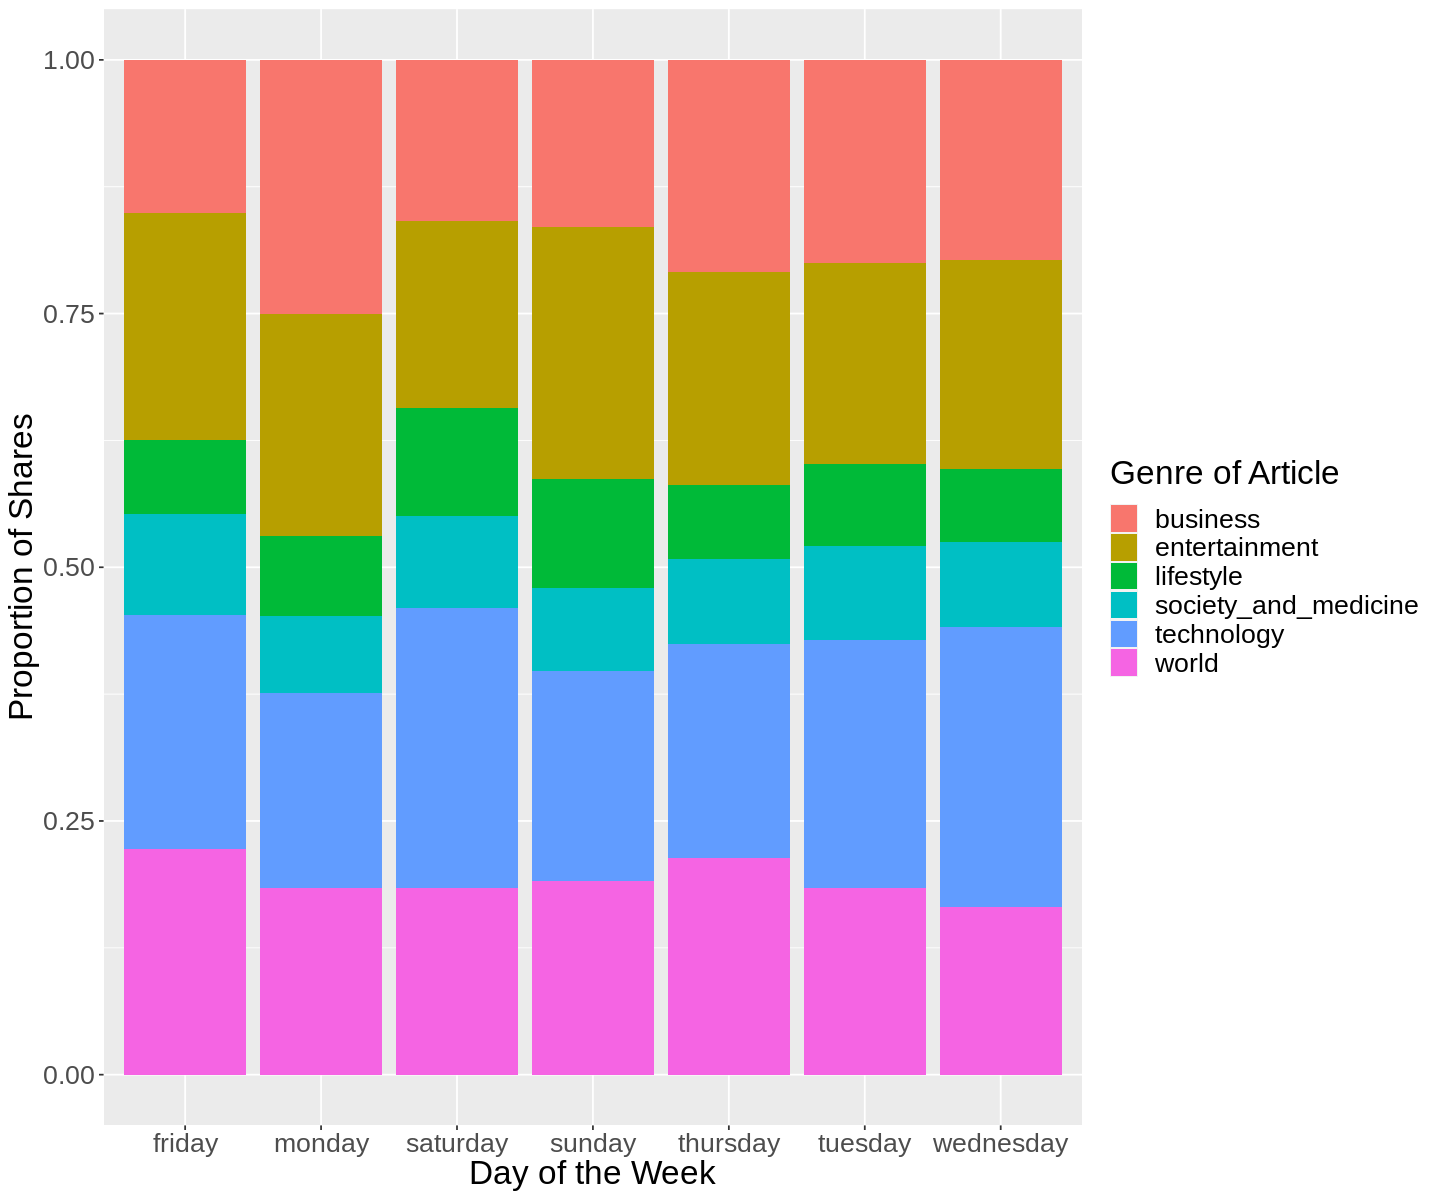

In [71]:



options(repr.plot.width = 12, repr.plot.height = 10)
share_plot_proportion <- share_data_totals %>%
    ggplot(aes(x = Day_Of_Week, y = shares, fill = Genre)) + 
    geom_bar(stat = 'identity', position = "fill") +
    xlab("Day of the Week") +
    ylab("Proportion of Shares") +
    labs(fill = "Genre of Article") +
    theme(text = element_text(size = 20))

share_plot_proportion

In [72]:
daily_totals <- share_data_totals %>%
    group_by(Day_Of_Week) %>%
    summarize(Total_Shares = sum(shares))
daily_totals

`summarise()` ungrouping output (override with `.groups` argument)



Day_Of_Week,Total_Shares
<chr>,<dbl>
friday,12488330
monday,17169676
saturday,6717594
sunday,7312724
thursday,16294503
tuesday,16758269
wednesday,16736658


In [73]:
share_daily_proportions <- share_data_totals %>%
    inner_join(daily_totals) %>%
    mutate(share_proportion = shares/Total_Shares)
head(share_daily_proportions)

Joining, by = "Day_Of_Week"



Day_Of_Week,Genre,n,shares,Total_Shares,share_proportion
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
friday,business,782,1888692,12488330,0.15123655
friday,entertainment,924,2784753,12488330,0.22298842
friday,lifestyle,299,913490,12488330,0.07314749
friday,society_and_medicine,311,1248370,12488330,0.09996293
friday,technology,937,2870720,12488330,0.22987221
friday,world,1239,2782305,12488330,0.22279240


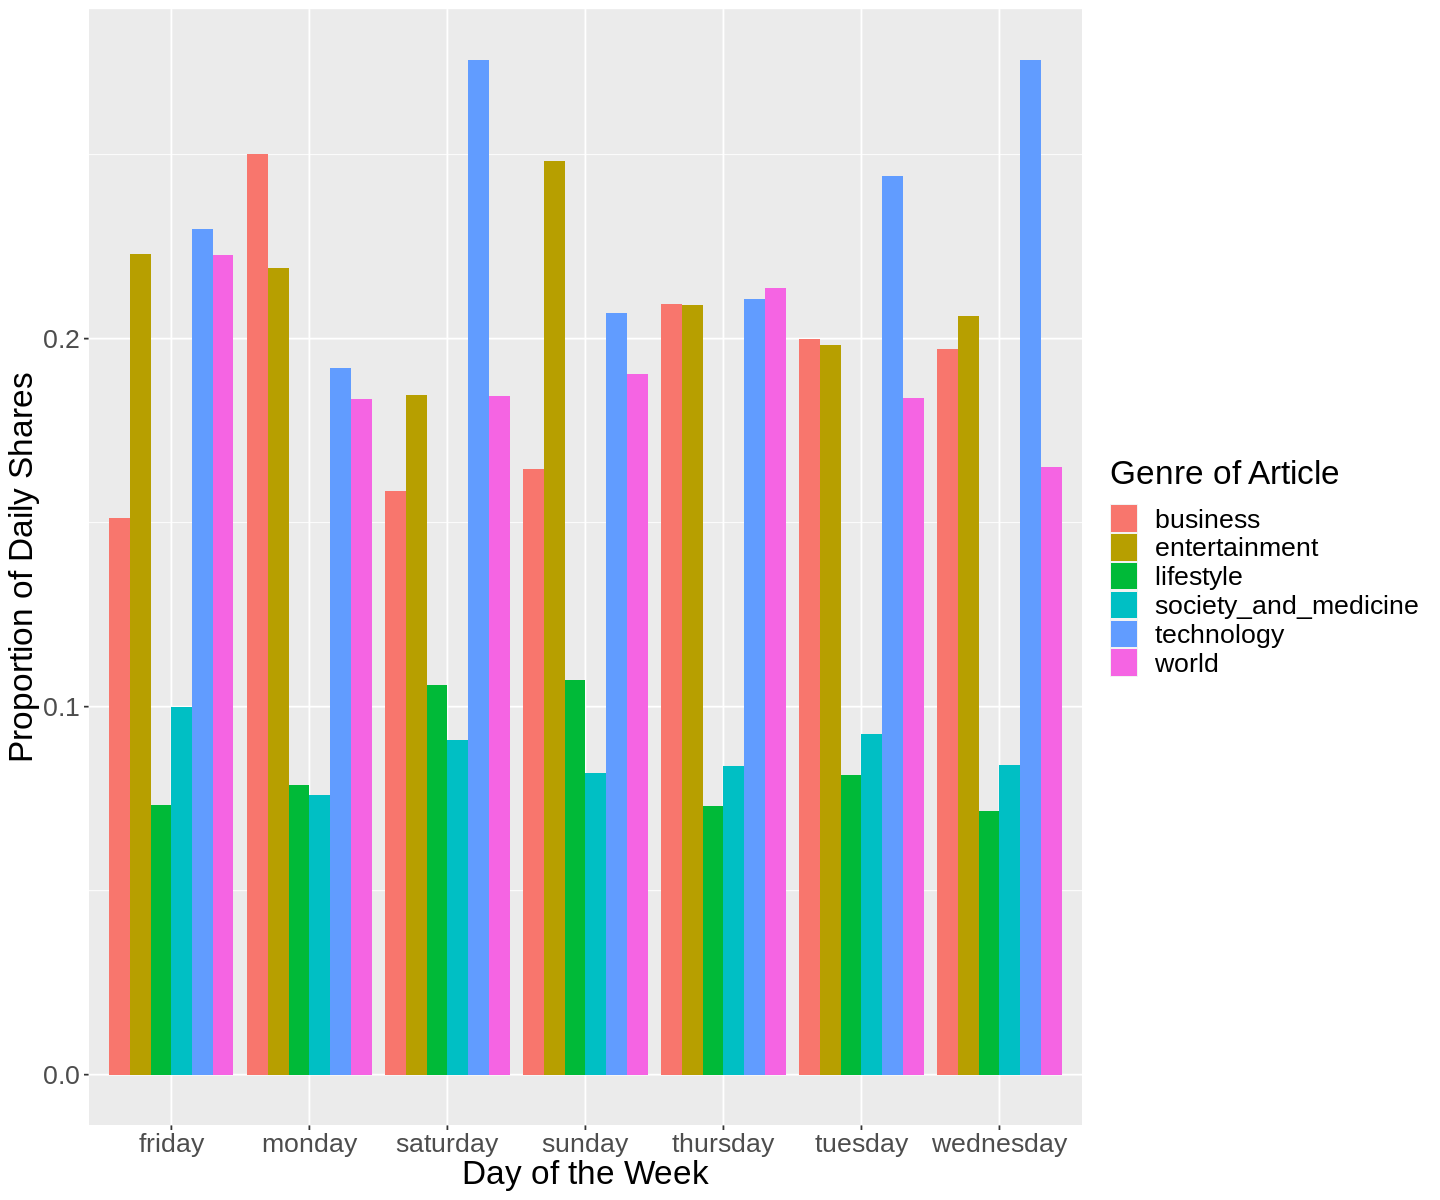

In [74]:
options(repr.plot.width = 12, repr.plot.height = 10)
share_plot_proportioned <- share_daily_proportions %>%
    ggplot(aes(x = Day_Of_Week, y = share_proportion, fill = Genre)) + 
    geom_bar(stat = 'identity', position = "dodge") +
    xlab("Day of the Week") +
    ylab("Proportion of Daily Shares") +
    labs(fill = "Genre of Article") +

    theme(text = element_text(size = 20))

share_plot_proportioned

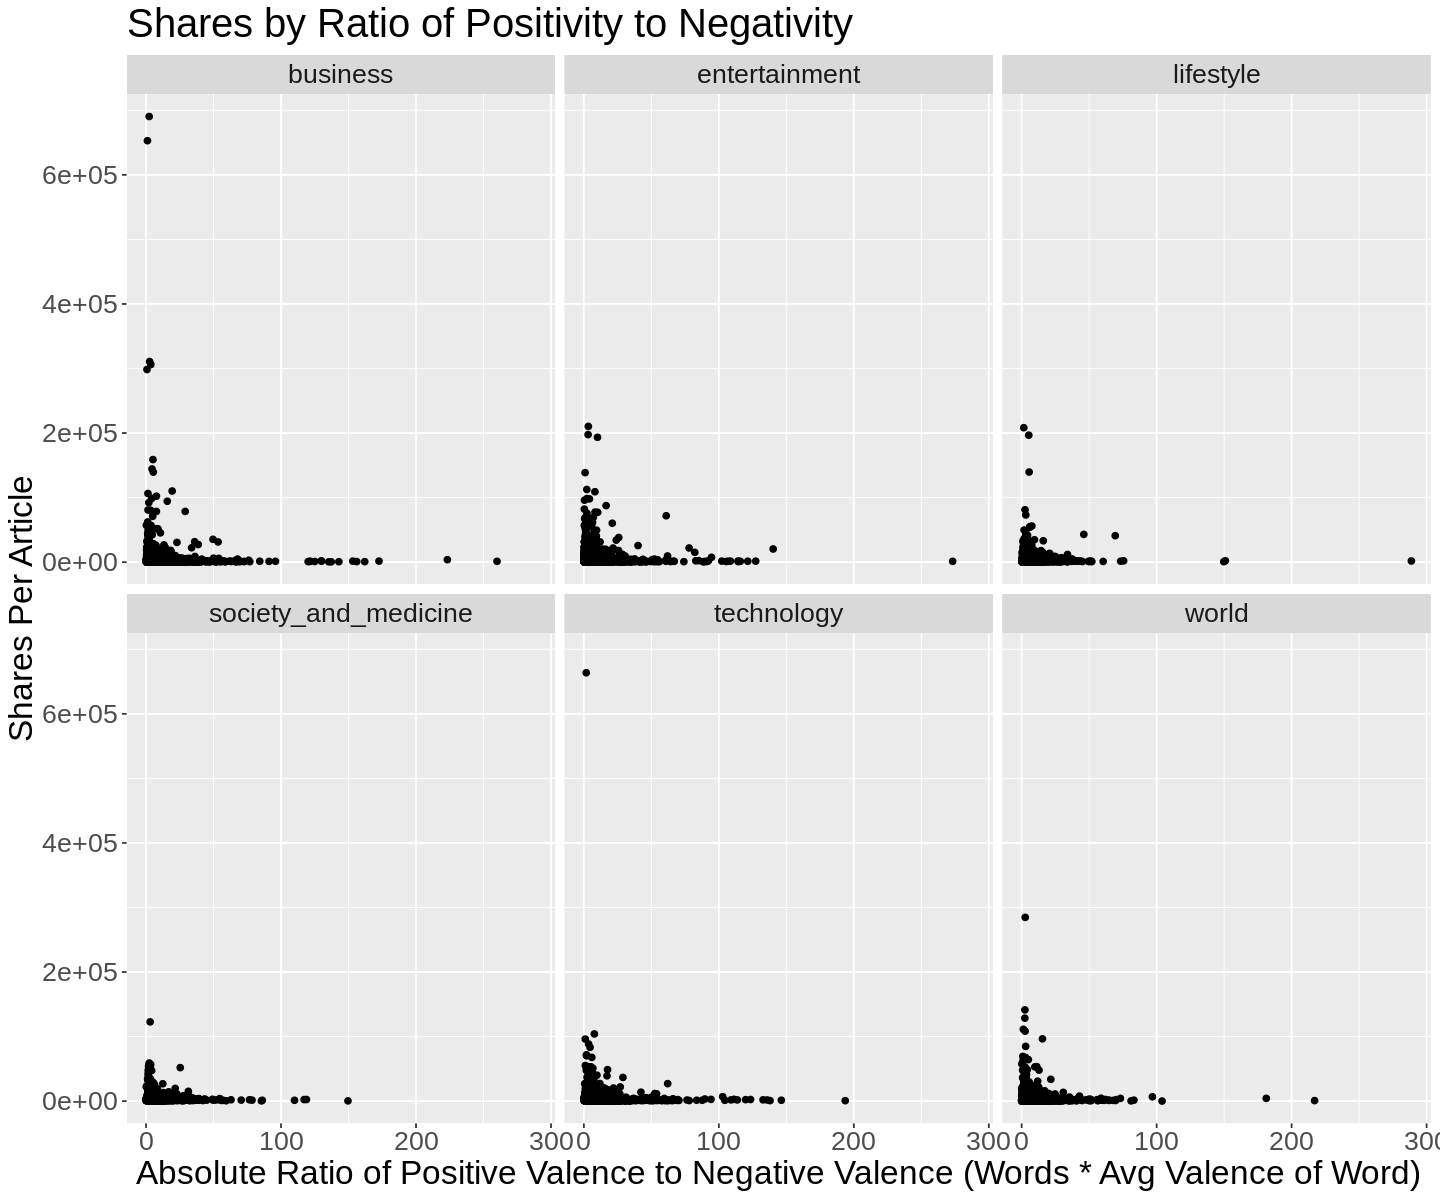

In [75]:
options(repr.plot.width = 12, repr.plot.height = 10)
ratio_plot <- tidy_data %>%
    ggplot(aes(x = abs_pos_neg_ratio, y = shares)) + 
    geom_point() +
    xlab("Absolute Ratio of Positive Valence to Negative Valence (Words * Avg Valence of Word)") +
    ylab("Shares Per Article") +
    ggtitle("Shares by Ratio of Positivity to Negativity")+
    theme(text = element_text(size = 20))+
    facet_wrap(~ Genre)

ratio_plot


`summarise()` ungrouping output (override with `.groups` argument)



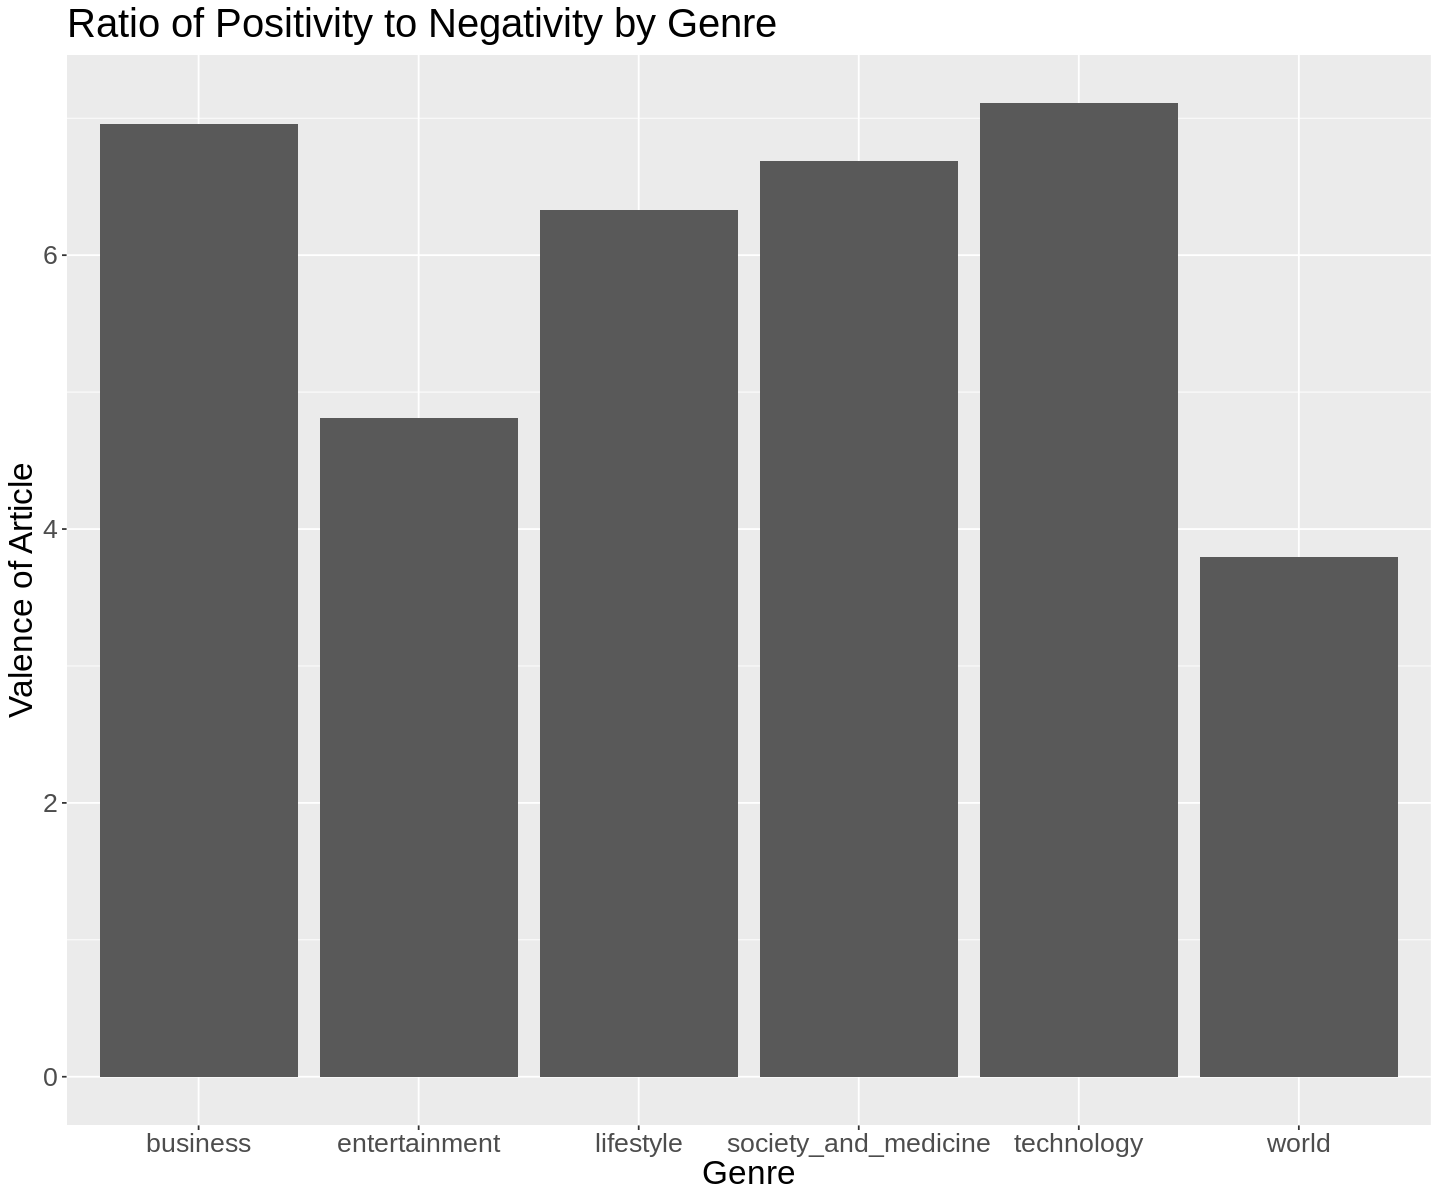

In [76]:
options(repr.plot.width = 12, repr.plot.height = 10)
valence_plot <- tidy_data %>%
    group_by(Genre) %>%
    summarize(average_valence = mean(abs_pos_neg_ratio)) %>%
    ggplot(aes(x = Genre, y = average_valence)) + 
    geom_bar(stat = 'identity', position = "dodge") +
    xlab("Genre") +
    ylab("Valence of Article") +
    ggtitle("Ratio of Positivity to Negativity by Genre")+
    theme(text = element_text(size = 20))

valence_plot